In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os

# Reading image data

In [2]:
Parasitized_cell=os.listdir('cell_images/cell_images/Parasitized')
uninfected_cell=os.listdir('cell_images/cell_images/Uninfected')
print("Parasitized cell:",len(Parasitized_cell))
print("Uninfcted cell:",len(uninfected_cell))

Parasitized cell: 13780
Uninfcted cell: 13780


# Resizing Cell images

In [3]:
width = 68
height = 68

# Rescaling the images by dividing with 255 (which is the highest pixel of an image) which in turn will scale the images to 0 and 1.

In [4]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing Train & Test

In [5]:
trainDatagen = datagen.flow_from_directory(directory='C:\\Users\\ontor\\Downloads\\cell_images\\cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [6]:
trainDatagen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

# Validation set

In [7]:
valDatagen = datagen.flow_from_directory(directory='C:\\Users\\ontor\\Downloads\\cell_images\\cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


# Creating CNN model

In [8]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(width,height,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 66, 66, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 33, 33, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
history=model.fit_generator(generator=trainDatagen,
                            steps_per_epoch=len(trainDatagen),
                            epochs=6,
                            validation_data=valDatagen ,
                            validation_steps=len(valDatagen )
                           )

C:\Users\ontor\AppData\Local\Temp/ipykernel_9448/961808951.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=trainDatagen,


Epoch 1/6
1378/1378 [==============================] - 214s 155ms/step - loss: 0.4396 - accuracy: 0.8076 - val_loss: 0.2505 - val_accuracy: 0.9265
Epoch 2/6
1378/1378 [==============================] - 47s 34ms/step - loss: 0.2346 - accuracy: 0.9226 - val_loss: 0.1970 - val_accuracy: 0.9258
Epoch 3/6
1378/1378 [==============================] - 49s 36ms/step - loss: 0.2084 - accuracy: 0.9358 - val_loss: 0.1816 - val_accuracy: 0.9383
Epoch 4/6
1378/1378 [==============================] - 46s 34ms/step - loss: 0.1909 - accuracy: 0.9423 - val_loss: 0.1719 - val_accuracy: 0.9385
Epoch 5/6
1378/1378 [==============================] - 52s 38ms/step - loss: 0.1771 - accuracy: 0.9464 - val_loss: 0.1673 - val_accuracy: 0.9359
Epoch 6/6
1378/1378 [==============================] - 45s 33ms/step - loss: 0.1586 - accuracy: 0.9511 - val_loss: 0.1742 - val_accuracy: 0.9327


# Saving the model in hdf5 format to access it in the streamlit app

In [12]:
tf.keras.models.save_model(model,'mymodel.hdf5')

# Writing the code for the streamlit app to host online 

In [13]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st

@st.cache(allow_output_mutation=True)

def load_model():
    model=tf.keras.models.load_model("C:\\Users\\ontor\\Downloads\\mymodel.hdf5")
    return model
with st.spinner('Model is being loaded..'):
    model=load_model()
    
st.write("""
         # Malaria-infected Cell Classification
         """
         )

file = st.file_uploader("Please upload a cell image file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np

def import_and_predict(image_data, model):
    size = (68,68)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)
    
    return prediction

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    if predictions == [[1.]]:
        string = "The patient doesn't have malaria infected cells"
    else:
        string = "The patient has malaria infected cells"
    st.success(string)
        
    



        


Overwriting app.py


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

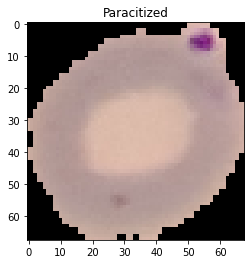

In [18]:
testimg_path="C:\\Users\\ontor\\Downloads\\models\\test_images\\Parasitized\\C39P4thinF_original_IMG_20150622_105102_cell_90.png"
img=image.load_img(testimg_path,target_size=(68,68))
plt.imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
if val==0:
    plt.title("Paracitized")
else:
    plt.title("Uninfected")

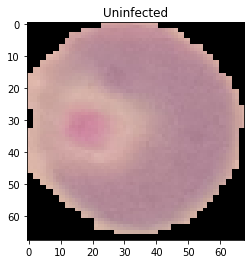

In [20]:
testimg_path="C:\\Users\\ontor\\Downloads\\models\\test_images\\Uninfected\\C3thin_original_IMG_20150608_163047_cell_36.png"
img=image.load_img(testimg_path,target_size=(68,68))
plt.imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
if val==0:
    plt.title("Paracitized")
else:
    plt.title("Uninfected")